In [2]:
import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import mne
import scipy
import statistics
from pywt import wavedec
from scipy import signal
import matplotlib.colors as mcolors
import random
import seaborn as sns
import os
from scipy import stats
import statsmodels.api as sm
from numpy import asarray
from numpy import savetxt
import pickle
import csv

In [4]:
from Extract_info import calcul

In [6]:
from BandPower_Epoch_1c import BanPoer_Epoch
from BandPower_Epoch_1c import BanPoer_Epoch2
from BandPower_Epoch_1c import bandpower

In [8]:
with open("PROGRAMA FINAL/EO_EC_Pacients_save.txt", "rb") as fp:   # Unpickling
    EO_EC_Pacients_up = pickle.load(fp)


with open("PROGRAMA FINAL/sorted_list_ECsave.txt", "rb") as fp:   # Unpickling
    sorted_list_EC_up = pickle.load(fp)


with open("PROGRAMA FINAL/sorted_list_EO_save.txt", "rb") as fp:   # Unpickling
    sorted_list_EO_up = pickle.load(fp)

In [10]:
#Import the data to analise
# open the file in universal line ending mode 
with open('Files/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  reader = csv.DictReader(infile)
  data = {}
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_well_being = data['TeiQueSF_well_being']

In [ ]:
for i in range(0,2):
    print(i)
    p1 = ('chanels_'+str(i)+'_delta_EO')
    p2 = ('chanels_'+str(i)+'_theta_EO')
    p3 = ('chanels_'+str(i)+'_alpha_EO')
    p4 = ('chanels_'+str(i)+'_beta_EO')
    p5 = ('chanels_'+str(i)+'_gama_l_EO')
    p6 = ('chanels_'+str(i)+'_gama_u_EO')
    p1, p2, p3, p4, p5, p6 = BanPoer_Epoch(EO_EC_Pacients_up, 0,i)

    dicnom = ('chanels_'+str(i)+'_EO')
    dicnom = {}
    dicnom = {
        "Delta": p1,
        "Theta": p2,
        "Alpha": p3,
        "Beta": p4,
        "Gama_lower": p5,
        "Gama_upper": p6}


In [ ]:
for i in range(0,2):
    print(i)
    p1 = ('chanels_'+str(i)+'_delta_EO')
    p2 = ('chanels_'+str(i)+'_theta_EO')
    p3 = ('chanels_'+str(i)+'_alpha_EO')
    p4 = ('chanels_'+str(i)+'_beta_EO')
    p5 = ('chanels_'+str(i)+'_gama_l_EO')
    p6 = ('chanels_'+str(i)+'_gama_u_EO')
    p1, p2, p3, p4, p5, p6 = BanPoer_Epoch2(EO_EC_Pacients_up, 0,i)

    dicnom = ('chanels_'+str(i)+'_EO')
    dicnom = {}
    dicnom = {
        "Delta": p1,
        "Theta": p2,
        "Alpha": p3,
        "Beta": p4,
        "Gama_lower": p5,
        "Gama_upper": p6}

In [12]:
chanels1_delta_EO, chanels1_theta_EO, chanels1_alpha_EO, chanels1_beta_EO, chanels1_gama_l_EO, chanels1_gama_u_EO  = BanPoer_Epoch(EO_EC_Pacients_up, 0,0)
chanel1_EO = {}
chanel1_EO = {
    "Delta": chanels1_delta_EO,
    "Theta": chanels1_theta_EO,
    "Alpha": chanels1_alpha_EO,
    "Beta": chanels1_beta_EO,
    "Gama_lower": chanels1_gama_l_EO,
    "Gama_upper": chanels1_gama_u_EO}

In [14]:
chanels1_delta_EO2, chanels1_theta_EO2, chanels1_alpha_EO2, chanels1_beta_EO2, chanels1_gama_l_EO2, chanels1_gama_u_EO2 = BanPoer_Epoch2(EO_EC_Pacients_up, 0,0)
chanel1_EO2 = {}
chanel1_EO2 = {
    "Delta": chanels1_delta_EO2,
    "Theta": chanels1_theta_EO2,
    "Alpha": chanels1_alpha_EO2,
    "Beta": chanels1_beta_EO2,
    "Gama_lower": chanels1_gama_l_EO,
    "Gama_upper": chanels1_gama_u_EO}

In [16]:
chanels1_delta_EO[10]

0.17746749017018348

In [18]:
chanels1_delta_EO2[10]

7.391428215856357e-13

In [27]:

def calcul1(names, sorted_list_EO, TeiQueSF_emotionality, pacient_beta, yo, oy, color):
    all_info = []
    x_corr = []
    y_corr = []
    for i in range(0, len(sorted_list_EO)):
        hename = sorted_list_EO[i]
        hename = str(hename[:-7])
        if hename in names:
            indices = [i for i, s in enumerate(names) if hename in s]
            x = (float(TeiQueSF_emotionality[int(indices[0])]))
            x_corr.append(x)
            y = (float(pacient_beta[i]))
            y_corr.append(y)
            plt.scatter(x,y, c=color)
            
    #LINE EC
    z = np.poly1d(np.polyfit(x_corr, y_corr, 1))
    y_len = np.array(len(y_corr))
    xp = np.linspace(yo, oy, y_len)
    y = z(xp)
    plt.plot(xp, y, c='b')

    #PLOT ALL POINTS
    plt.title('Plot show the correlation between TeiQueSF_emotionality and Band Power')
    print(stats.pearsonr(x_corr, y_corr))

    return stats.pearsonr(x_corr, y_corr)



def minus_return_bandpower1(names, sorted_list_EO, TeiQueSF_emotionality, list_bands):
    all_info = []
    x_corr = []
    y_corr = []
    minus_5 = []
    contador = 0
    for e in list_bands:
        for i in range(0, len(sorted_list_EO)):
            hename = sorted_list_EO[i]
            hename = str(hename[:-7])
            if hename in names:
                indices = [i for i, s in enumerate(names) if hename in s]
                x = (float(TeiQueSF_emotionality[int(indices[0])]))
                if x<5.0:
                    contador = contador + 1
                    x_corr.append(x)
                    y = (float(e[i]))
                    y_corr.append(y)

        #PLOT ALL POINTS
        resultat = statistics.median(y_corr)
        minus_5.append(resultat)
        print('menos 5')
        print(contador)
        
    return minus_5




def max5_return_bandpower1(names, sorted_list_EO, TeiQueSF_emotionality, list_bands):
    all_info = []
    x_corr = []
    y_corr = []
    max_5 = []
    contador = 0 
    for e in list_bands:
        for i in range(0, len(sorted_list_EO)):
            hename = sorted_list_EO[i]
            hename = str(hename[:-7])
            if hename in names:
                indices = [i for i, s in enumerate(names) if hename in s]
                x = (float(TeiQueSF_emotionality[int(indices[0])]))
                if x>5.0:
                    x_corr.append(x)
                    y = (float(e[i]))
                    y_corr.append(y)
                    contador = contador + 1

        #PLOT ALL POINTS
        resultat = statistics.median(y_corr)
        max_5.append(resultat)
        print('max 5')
        print(contador)


    return max_5


def plotbar_info_bandpower1 (names, sorted_list_EO, TeiQueSF_emotionality, list_bands):
    #chanels1_delta_EO, chanels1_theta_EO, chanels1_alpha_EO, chanels1_beta_EO, chanels1_gama_l_EO, chanels1_gama_u_EO
    labels = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gama Lower', 'Gama Upper']
    minus5 = minus_return_bandpower1(names, sorted_list_EO, TeiQueSF_emotionality, list_bands)
    max5 = max5_return_bandpower1(names, sorted_list_EO, TeiQueSF_emotionality, list_bands)
    print(minus5)

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, minus5, width, label='-5')
    rects2 = ax.bar(x + width/2, max5, width, label='+5')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Band Power')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()


(-0.011776288580761103, 0.8735942517682991)
(0.07754391254015308, 0.29411222789730596)
(0.015783444267012236, 0.8311426732580769)
(-0.11232030542619474, 0.12796210007005437)
(-0.10255089644564673, 0.1648163543233358)
menos 5
80
menos 5
160
menos 5
240
menos 5
320
menos 5
400
menos 5
480
max 5
91
max 5
182
max 5
273
max 5
364
max 5
455
max 5
546
[0.17311398510360695, 0.19498286483661087, 0.17311398510360695, 0.16904191472629027, 0.1617297764598139, 0.14847910220834942]


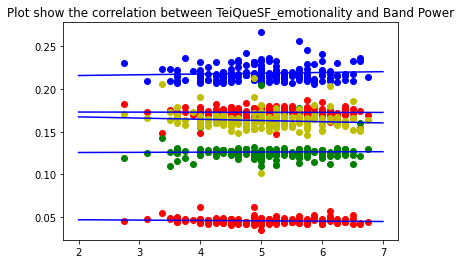

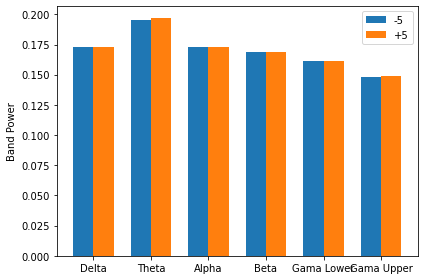

In [28]:
list_bands_c1_EO =[chanels1_delta_EO, chanels1_theta_EO, chanels1_alpha_EO, chanels1_beta_EO, chanels1_gama_l_EO, chanels1_gama_u_EO]
colors = ['r','b','g','y','r']
pi_x_patient=[]

for e in range(0,5):
    eo_betta_pi = calcul1(names, sorted_list_EO_up, TeiQueSF_emotionality, list_bands_c1_EO[e], 2, 7, colors[e])
    pi_x_patient.append(eo_betta_pi)
plotbar_info_bandpower1(names, sorted_list_EO_up, TeiQueSF_emotionality, list_bands_c1_EO)

(0.11996353265075564, 0.10384324759977362)
(0.13413362527850375, 0.0687158288454709)
(0.09441191876548685, 0.20114561304456813)
(0.08302758253651785, 0.26118948236520917)
(0.061460884262029614, 0.40592931553340533)
menos 5
80
menos 5
160
menos 5
240
menos 5
320
menos 5
400
menos 5
480
max 5
91
max 5
182
max 5
273
max 5
364
max 5
455
max 5
546
[8.923981696060825e-13, 9.616270133834983e-13, 8.923981696060825e-13, 8.697679263919833e-13, 8.283175392981045e-13, 7.655864436641357e-13]


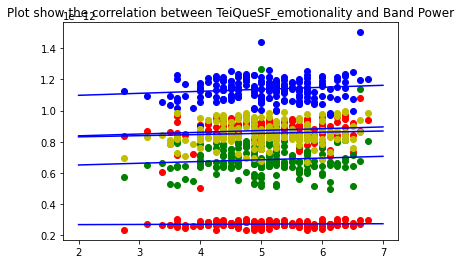

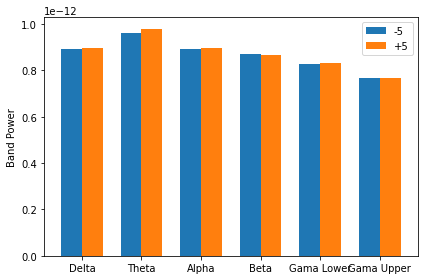

In [29]:
list_bands_c1_EO2 =[chanels1_delta_EO2, chanels1_theta_EO2, chanels1_alpha_EO2, chanels1_beta_EO2, chanels1_gama_l_EO2, chanels1_gama_u_EO2]
colors = ['r','b','g','y','r']
pi_x_patient=[]

for e in range(0,5):
    eo_betta_pi = calcul1(names, sorted_list_EO_up, TeiQueSF_emotionality, list_bands_c1_EO2[e], 2, 7, colors[e])
    pi_x_patient.append(eo_betta_pi)
from Extract_info import plotbar_info_bandpower
plotbar_info_bandpower1(names, sorted_list_EO_up, TeiQueSF_emotionality, list_bands_c1_EO2)